In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from tensorflow import keras


In [2]:
iris = load_iris()
x = iris.data[:,(2,3)] #petal length,petal width
y = (iris.target ==0).astype(np.int)


In [3]:
#tlu perceptron as model
per_clf = Perceptron()
per_clf.fit(x,y)
y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([0])

In [5]:
per_clf.coef_

array([[-0.7, -1.2]])

In [6]:
per_clf.intercept_

array([2.])

In [7]:
a = -per_clf.coef_[0][0]/ per_clf.coef_[0][1]
b = -per_clf.intercept_/per_clf.coef_[0][1]

In [8]:
x0,x1 = np.meshgrid(
                    np.linspace(0,5,500).reshape(-1,1),
                    np.linspace(0,2,200).reshape(-1,1),
)

In [9]:
x_new = np.c_[x0.ravel(),x1.ravel()]

In [10]:
x_new

array([[0.        , 0.        ],
       [0.01002004, 0.        ],
       [0.02004008, 0.        ],
       ...,
       [4.97995992, 2.        ],
       [4.98997996, 2.        ],
       [5.        , 2.        ]])

In [11]:
y_predict = per_clf.predict(x_new)


In [12]:
y_1 = y_predict.reshape(x0.shape)

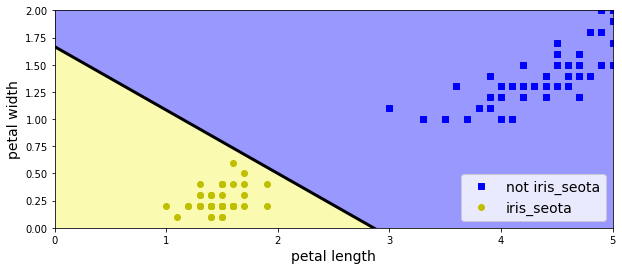

In [13]:
plt.figure(figsize = (10,4))
#plot instances
plt.plot(x[y==0,0],x[y==0,1],"bs",label = "not iris_seota")
plt.plot(x[y==1,0],x[y==1,1],"yo",label = "iris_seota")
#plot model(classifier)
plt.plot([0,5],[a*0+b,a*5+b],"k-",linewidth= 3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0,x1,y_1,cmap = custom_cmap)
plt.xlabel("petal length",fontsize = 14)
plt.ylabel("petal width",fontsize = 14)
plt.legend(loc = "best",fontsize = 14)
plt.axis([0,5,0,2])
plt.show()

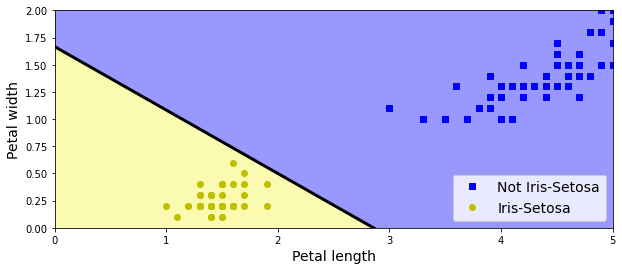

In [14]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "yo", label="Iris-Setosa")
axes = [0, 5, 0, 2]
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

In [15]:
!pip install pydot

In [16]:
!pip install graphviz

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [19]:
x_train_full.shape

(60000, 28, 28)

In [20]:
x_train_full.dtype

dtype('uint8')

In [21]:
#create validation set
#and ;ets scale data in 0-1
x_valid,x_train = x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [22]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
class_names[y_train[0]]

'Coat'

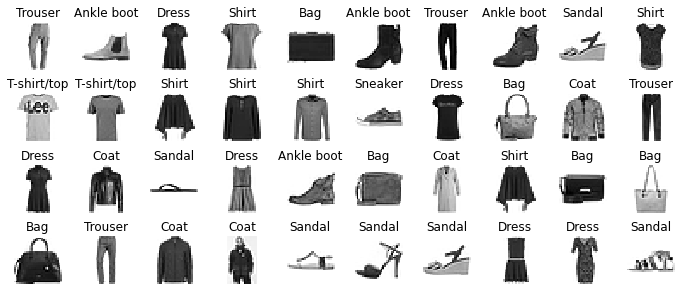

In [24]:
n_cols = 10
n_rows = 4
plt.figure(figsize = (n_cols *1.2,n_rows*1.2))
i=0
for row in range(n_rows):
    for col in range(n_cols):
        index = np.random.randint(1000,size = 40)
        plt.subplot(n_rows,n_cols,i+1)
        plt.imshow(x_train[index[i]],cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index[i]]])
        i = i+1
plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
plt.show()

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
keras.utils.plot_model(model,"my_fashion_model.png",show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer(hidden1.name) is hidden1

True

In [32]:
weights,biases = hidden1.get_weights() 

In [33]:
weights

array([[-0.06029221, -0.00958009, -0.01632727, ..., -0.00172928,
        -0.01872951, -0.0268025 ],
       [ 0.06035616,  0.00754299,  0.03671736, ..., -0.0352328 ,
         0.04375781,  0.07211739],
       [ 0.04857651, -0.04511378,  0.04229692, ..., -0.0447889 ,
         0.02494251, -0.03246607],
       ...,
       [ 0.04991576,  0.047566  , -0.05797376, ..., -0.03258495,
         0.01299383, -0.04913637],
       [ 0.01147503, -0.07130314,  0.0607366 , ..., -0.04067003,
        -0.06806495,  0.03969882],
       [ 0.0569811 ,  0.00951006, -0.04042487, ...,  0.00297434,
         0.03286663, -0.05170342]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [37]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [38]:
history = model.fit(x_train,y_train,epochs =30,validation_data = (x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0146 - accuracy: 0.6759 - val_loss: 0.5220 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5070 - accuracy: 0.8233 - val_loss: 0.4353 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8413 - val_loss: 0.5725 - val_accuracy: 0.7900
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4240 - accuracy: 0.8520 - val_loss: 0.3957 - val_accuracy: 0.8682
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4084 - accuracy: 0.8563 - val_loss: 0.3803 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8662 - val_loss: 0.3724 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3670 - accuracy: 0.8714 - val_loss: 0.3694 - val_accuracy:

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

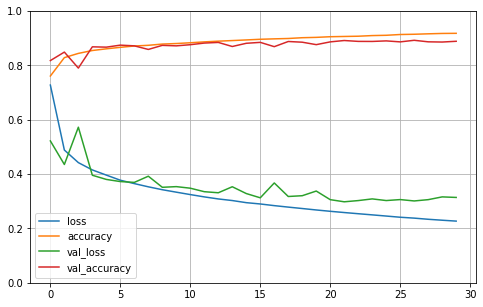

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.ylim([0,1])
plt.show()


In [43]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 80.9467 - accuracy: 0.8269


[80.9466781616211, 0.8269000053405762]

In [44]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_pred = model.predict_classes(x_new)
y_pred

c:\users\1042g\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

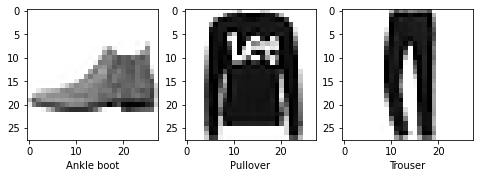

In [47]:
plt.figure(figsize = (8,4))
for index,image in enumerate(x_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap= "binary",interpolation = "nearest")
    plt.xlabel(np.array(class_names)[y_pred][index])
plt.show()

## regression mlp

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [49]:
housing = fetch_california_housing()


In [50]:
x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full)

In [51]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)
x_valid= scaler.fit_transform(x_valid)


In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation= "relu",input_shape= x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error",optimizer = "sgd")
history = model.fit(x_train,y_train,epochs = 20,validation_data = (x_valid,y_valid))
mse_test = model.evaluate(x_test,y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1465 - val_loss: 1.1121
Epoch 2/20
363/363 [==============================] - 0s 936us/step - loss: 0.7658 - val_loss: 0.5050
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4732 - val_loss: 0.4734
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4492 - val_loss: 0.4622
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4215 - val_loss: 0.4538
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4276 - val_loss: 0.4480
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4152 - val_loss: 0.4383
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4072 - val_loss: 0.4399
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4053 - val_loss: 0.4297
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4008 - val_loss: 0.42

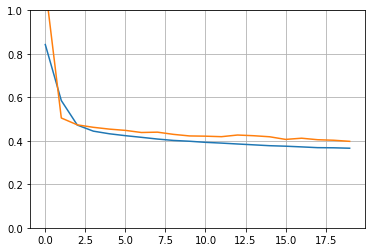

In [53]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.ylim([0,1])
plt.show()

## functional API

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
input_= keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation = "relu")(input_)
hidden2 = keras.layers.Dense(30,activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_],outputs = [output])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

In [57]:
model.compile(loss = "mse",optimizer = keras.optimizers.SGD(lr=1e-3))

In [58]:
history = model.fit(x_train,y_train,epochs = 20,validation_data = (x_valid,y_valid))
mse_test = model.evaluate(x_test,y_test)
x_new = x_test[:3]
y_pred = model.predict(x_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0692 - val_loss: 0.7007
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7140 - val_loss: 0.6377
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6134 - val_loss: 0.6081
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5842 - val_loss: 0.5911
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5606 - val_loss: 0.5679
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5543 - val_loss: 0.5537
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5373 - val_loss: 0.5429
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5131 - val_loss: 0.5328
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5204 - val_loss: 0.5224
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5020 - val_loss: 0.5146

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape = [5],name = "wideinput")
input_B = keras.layers.Input(shape = [6],name = "deep input")
hidden1 = keras.layers.Dense(30,activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30,activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name= "output")(concat)
model = keras.Model(inputs = [input_A,input_B],outputs = [output])

In [61]:
model.compile(loss = "mse",optimizer = keras.optimizers.SGD(lr = 1e-3))
x_train_A,x_train_B = x_train[:,:5],x_train[:,2:]
x_test_A,x_test_B = x_test[:,:5],x_test[:,2:]
x_valid_A,x_valid_B = x_valid[:,:5],x_valid[:,2:]
x_new_A,x_new_B = x_test_A[:3],x_test_B[:3]
history = model.fit((x_train_A,x_train_B),y_train,validation_data =((x_valid_A,x_valid_B),y_valid),epochs =20)
mse_test = model.evaluate((x_test_A,x_test_B),y_test)
y_pred = model.predict((x_new_A,x_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1734 - val_loss: 0.7874
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7638 - val_loss: 0.6512
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6385 - val_loss: 0.6100
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5908 - val_loss: 0.5873
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5605 - val_loss: 0.5680
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5577 - val_loss: 0.5534
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5352 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5202 - val_loss: 0.5333
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5298 - val_loss: 0.5249
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5119 - val_loss: 0.5190

In [62]:
np.random.seed(42)
tf.random.set_seed(42)


In [63]:
input_A = keras.layers.Input(shape = [5],name = "wideinput")
input_B = keras.layers.Input(shape = [6],name = "deep input")
hidden1 = keras.layers.Dense(30,activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30,activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name= "mai_output")(concat)
aux_output = keras.layers.Dense(1,name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A,input_B],outputs = [output,aux_output])

In [64]:
model.compile(loss = ["mse","mse"],loss_weights = [0.9,0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit([x_train_A,x_train_B],[y_train,y_train],
                    validation_data = ([x_valid_A,x_valid_B],[y_valid,y_valid]),epochs = 20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.4273 - mai_output_loss: 3.3055 - aux_output_loss: 4.5230 - val_loss: 1.0539 - val_mai_output_loss: 0.8191 - val_aux_output_loss: 3.1668
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0033 - mai_output_loss: 0.7887 - aux_output_loss: 2.9343 - val_loss: 0.8142 - val_mai_output_loss: 0.6612 - val_aux_output_loss: 2.1915
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7919 - mai_output_loss: 0.6493 - aux_output_loss: 2.0756 - val_loss: 0.7335 - val_mai_output_loss: 0.6185 - val_aux_output_loss: 1.7681
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7102 - mai_output_loss: 0.5994 - aux_output_loss: 1.7080 - val_loss: 0.6924 - val_mai_output_loss: 0.5957 - val_aux_output_loss: 1.5624
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6676 - mai_output_loss: 0.5696 - aux_output_loss: 1.5500 - val_loss: 0.6629 

In [65]:
total_loss,main_lodd,aux_loss = model.evaluate([x_test_A,x_test_B],[y_test,y_test])
y_pred_main,y_pred_aux = model.predict([x_new_A,x_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4871 - mai_output_loss: 0.4390 - aux_output_loss: 0.9202


## sublassing API

In [66]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units = 30,activation = "relu",**kwargs):
        super().__init__(**kwargs) #handles standard args
        self.hidden1 = keras.layers.Dense(units,activation = activation)
        self.hidden2= keras.layers.Dense(units,activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output= self.aux_output(hidden2)
        return main_output,aux_output

In [67]:
model = WideAndDeepModel(30,activation = "relu")

In [68]:
model.compile(loss = ["mse","mse"],loss_weights = [0.9,0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit([x_train_A,x_train_B],[y_train,y_train],
                    validation_data = ([x_valid_A,x_valid_B],[y_valid,y_valid]),epochs = 20)
total_loss,main_lodd,aux_loss = model.evaluate([x_test_A,x_test_B],[y_test,y_test])
y_pred_main,y_pred_aux = model.predict([x_new_A,x_new_B])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.3781 - output_1_loss: 3.3090 - output_2_loss: 3.9997 - val_loss: 1.1427 - val_output_1_loss: 1.0021 - val_output_2_loss: 2.4077
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0748 - output_1_loss: 0.9336 - output_2_loss: 2.3456 - val_loss: 0.8745 - val_output_1_loss: 0.7625 - val_output_2_loss: 1.8823
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8633 - output_1_loss: 0.7529 - output_2_loss: 1.8571 - val_loss: 0.7911 - val_output_1_loss: 0.6945 - val_output_2_loss: 1.6614
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7785 - output_1_loss: 0.6834 - output_2_loss: 1.6342 - val_loss: 0.7441 - val_output_1_loss: 0.6575 - val_output_2_loss: 1.5229
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7302 - output_1_loss: 0.6415 - output_2_loss: 1.5285 - val_loss: 0.7103 - val_output_1_loss: 0.6295 - val_ou

## saving and restoring

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "relu",input_shape = [8]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [71]:
model.compile(loss = "mse",optimizer= keras.optimizers.SGD(lr = 1e-3))
history = model.fit(x_train,y_train,epochs = 20,validation_data = (x_valid,y_valid))
mse_test = model.evaluate(x_test,y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.3288 - val_loss: 0.8009
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7660 - val_loss: 0.6508
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6220 - val_loss: 0.6008
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5769 - val_loss: 0.5730
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5414 - val_loss: 0.5475
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5346 - val_loss: 0.5314
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5126 - val_loss: 0.5185
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4916 - val_loss: 0.5084
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4959 - val_loss: 0.4993
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4825 - val_loss: 0.4921

In [72]:
model.save("my_model.h5")

In [73]:
model = keras.models.load_model("my_model.h5")

In [74]:
model.predict(x_new)

array([[0.29403368],
       [1.7964561 ],
       [3.0011098 ]], dtype=float32)

In [75]:
model.save_weights("my_keras_weights.ckpt")

In [76]:
model.load_weights("my_keras_weights.ckpt")

## using callbacks during training

In [77]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
keras.models.Sequential([
    keras.layers.Dense(30,activation= "relu",input_shape = [8]),
    keras.layers.Dense(30,activation = "relu"),
    keras.layers.Dense(1)
])

In [79]:
model.compile(loss = "mse",optimizer = keras.optimizers.SGD(lr = 1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_kers_model.h5")
history = model.fit(x_train,y_train,epochs = 10,callbacks= [checkpoint_cb])
model = keras.models.load_model("my_model.h5") # rollback to best model
mse_test = model.evaluate(x_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 820us/step - loss: 0.4450
Epoch 2/10
363/363 [==============================] - 0s 824us/step - loss: 0.4494
Epoch 3/10
363/363 [==============================] - 0s 859us/step - loss: 0.4318
Epoch 4/10
363/363 [==============================] - 0s 781us/step - loss: 0.4340
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4194
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4230
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4221
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4260
Epoch 10/10
162/162 [==============================] - 0s 936us/step - loss: 0.4384


In [80]:
model.compile(loss = "mse",optimizer = keras.optimizers.SGD(lr = 1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights = True)
history = model.fit(x_train,y_train,epochs = 100, validation_data =(x_valid,y_valid),
                    callbacks = [early_stopping_cb,checkpoint_cb])
mse_test = model.evaluate(x_test,y_test)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4450 - val_loss: 0.4627
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4494 - val_loss: 0.4587
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4551
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4596
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4194 - val_loss: 0.4516
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4304 - val_loss: 0.4522
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4230 - val_loss: 0.4505
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4221 - val_loss: 0.4506
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4260 - val_loss: 0.4479
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4256 - val_lo

In [81]:
#custom callbacks
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print("\nval/train:{:.2f}".format(logs["val_loss"]/logs["loss"]))

In [82]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(x_train,y_train,epochs =1,validation_data =(x_valid,y_valid),
                    callbacks = [val_train_ratio_cb])

363/363 [==============================] - 0s 1ms/step - loss: 0.3486 - val_loss: 0.3817

val/train:1.09


## tensorboard for visualization

In [83]:
import os
root_logdir = os.path.join(os.curdir,"my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)
run_logdir = get_run_logdir()
run_logdir 

'.\\my_logs\\run_2021_04_05-09_58_01'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8,]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [89]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 2.3156 - val_loss: 0.8288
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8268 - val_loss: 0.7160
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6881 - val_loss: 0.6610
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6297 - val_loss: 0.6201
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5913 - val_loss: 0.5884
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5754 - val_loss: 0.5660
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5428 - val_loss: 0.5472
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5153 - val_loss: 0.5323
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5176 - val_loss: 0.5195
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5032 - val_loss: 0.5098

HYPERPARAMETER TUNING 

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
def build_model(n_hidden = 1,n_neurons = 10, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation = "relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse",optimizer = optimizer)
    return model 

In [107]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [108]:
keras_reg.fit(x_train,y_train,epochs = 100,validation_data =(x_valid,y_valid),callbacks =[keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras.reg.score(x_test,y_test)
y_pred = keras_reg.predict(x_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.6009 - val_loss: 0.8148
Epoch 2/100
363/363 [==============================] - 0s 954us/step - loss: 0.8194 - val_loss: 0.7090
Epoch 3/100
363/363 [==============================] - 0s 961us/step - loss: 0.6867 - val_loss: 0.6620
Epoch 4/100
363/363 [==============================] - 0s 965us/step - loss: 0.6362 - val_loss: 0.6309
Epoch 5/100
363/363 [==============================] - 0s 883us/step - loss: 0.5982 - val_loss: 0.6042
Epoch 6/100
363/363 [==============================] - 0s 911us/step - loss: 0.5900 - val_loss: 0.5861
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5638 - val_loss: 0.5702
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5407 - val_loss: 0.5575
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5417 - val_loss: 0.5470
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.526

Epoch 81/100
363/363 [==============================] - 0s 812us/step - loss: 0.3839 - val_loss: 0.4121
Epoch 82/100
363/363 [==============================] - 0s 861us/step - loss: 0.3748 - val_loss: 0.4140
Epoch 83/100
363/363 [==============================] - 0s 934us/step - loss: 0.3704 - val_loss: 0.4104
Epoch 84/100
363/363 [==============================] - 0s 945us/step - loss: 0.3700 - val_loss: 0.4118
Epoch 85/100
363/363 [==============================] - 0s 915us/step - loss: 0.3718 - val_loss: 0.4086
Epoch 86/100
363/363 [==============================] - 0s 893us/step - loss: 0.3699 - val_loss: 0.4121
Epoch 87/100
363/363 [==============================] - 0s 873us/step - loss: 0.3804 - val_loss: 0.4094
Epoch 88/100
363/363 [==============================] - 0s 830us/step - loss: 0.3659 - val_loss: 0.4074
Epoch 89/100
363/363 [==============================] - 0s 891us/step - loss: 0.3819 - val_loss: 0.4094
Epoch 90/100
363/363 [==============================] - 0s 921us

AttributeError: module 'tensorflow.keras' has no attribute 'reg'

In [114]:
mse_test = keras_reg.score(x_test, y_test)

162/162 [==============================] - 0s 675us/step - loss: 1.8256


In [117]:

y_pred = keras_reg.predict(x_new)

In [119]:
np.random.seed(42)
tf.random.set_seed(42)

In [120]:
from scipy.stats import reciprocal 
from sklearn.model_selection import RandomizedSearchCV


In [123]:
param_distribs= {
    "n_hidden":[0,1,2,3],
    "n_neurons": np.arange(1,100).tolist(),
    "learning_rate": reciprocal(3e-4,3e-2).rvs(1000).tolist()
}
rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter = 10,cv= 3)
rnd_search_cv.fit(x_train,y_train,epochs = 100,validation_data = (x_valid,y_valid),callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7002 - val_loss: 0.6794
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6511 - val_loss: 0.5741
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5203 - val_loss: 0.5399
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5030 - val_loss: 0.5295
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5046 - val_loss: 0.5124
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4817 - val_loss: 0.4872
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4757 - val_loss: 0.4843
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4488 - val_loss: 0.4713
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4402 - val_loss: 0.4643
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4252 - val_lo

242/242 [==============================] - 0s 1ms/step - loss: 0.3484 - val_loss: 0.4001
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3600 - val_loss: 0.3982
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 0.4036
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3579 - val_loss: 0.3997
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3600 - val_loss: 0.4022
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3285 - val_loss: 0.3976
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3497 - val_loss: 0.3969
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3389 - val_loss: 0.3963
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3460 - val_loss: 0.3987
Epoch 69/100
242/242 [==============================] - 0s 936us/step - loss: 0.3401 - val_loss

Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3617 - val_loss: 0.4460
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3653 - val_loss: 0.3913
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3414 - val_loss: 0.3920
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3444 - val_loss: 0.4078
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3406 - val_loss: 0.3727
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3503 - val_loss: 0.5145
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3418 - val_loss: 0.3846
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3359 - val_loss: 0.3677
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3304 - val_loss: 0.3643
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3307 -

242/242 [==============================] - 0s 1ms/step - loss: 0.2789 - val_loss: 0.3605
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2777 - val_loss: 0.3360
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2831 - val_loss: 0.3256
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2861 - val_loss: 0.3567
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2778 - val_loss: 0.3449
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2705 - val_loss: 0.3410
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2702 - val_loss: 0.3394
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2599 - val_loss: 0.3420
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2891 - val_loss: 0.3257
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2683 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3890 - val_loss: 0.4270
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3781 - val_loss: 0.4281
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.4249
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3628 - val_loss: 0.4216
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3563 - val_loss: 0.4250
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3717 - val_loss: 0.4186
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3607 - val_loss: 0.4191
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3584 - val_loss: 0.4144
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3530 - val_loss: 0.4159
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3735 - val_loss: 

Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4644 - val_loss: 0.4494
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4138 - val_loss: 0.4450
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4220 - val_loss: 0.4469
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4158 - val_loss: 0.4390
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4226 - val_loss: 0.4407
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4273 - val_loss: 0.4362
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4126 - val_loss: 0.4319
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4113 - val_loss: 0.4329
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4018 - val_loss: 0.4254
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4025

242/242 [==============================] - 0s 1ms/step - loss: 0.4516 - val_loss: 0.4921
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4755
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4499 - val_loss: 0.4634
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4266 - val_loss: 0.4436
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4261 - val_loss: 0.4389
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4003 - val_loss: 0.4648
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3997 - val_loss: 0.4326
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 0.4268
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3845 - val_loss: 0.4235
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3724 - val_loss: 0.4088

Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.4335
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3947 - val_loss: 0.4304
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.4155
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.4155
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3803 - val_loss: 0.4095
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3922 - val_loss: 0.4143
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3568 - val_loss: 0.4077
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3646 - val_loss: 0.4011
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3569 - val_loss: 0.3990
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3535 -

Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5376 - val_loss: 0.5497
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5329 - val_loss: 0.5467
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5005 - val_loss: 0.5438
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5234 - val_loss: 0.5417
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4985 - val_loss: 0.5392
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4900 - val_loss: 0.5368
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5077 - val_loss: 0.5346
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5114 - val_loss: 0.5323
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5115 - val_loss: 0.5303
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4972

242/242 [==============================] - 0s 974us/step - loss: 0.4702 - val_loss: 0.4866
Epoch 96/100
242/242 [==============================] - 0s 911us/step - loss: 0.4370 - val_loss: 0.4868
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4521 - val_loss: 0.4856
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4544 - val_loss: 0.4855
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4462 - val_loss: 0.4847
Epoch 100/100
121/121 [==============================] - 0s 620us/step - loss: 0.4804
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.9102 - val_loss: 2.8281
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.4282 - val_loss: 1.7807
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6274 - val_loss: 1.2899
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2345 - val_loss: 1.0616
Epoch 5/1

Epoch 75/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4924 - val_loss: 0.4947
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4958 - val_loss: 0.4940
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4678 - val_loss: 0.4931
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4602 - val_loss: 0.4928
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4993 - val_loss: 0.4920
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4850 - val_loss: 0.4918
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4731 - val_loss: 0.4908
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4673 - val_loss: 0.4902
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4744 - val_loss: 0.4895
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4801

Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4354 - val_loss: 0.4662
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4259 - val_loss: 0.4638
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4128 - val_loss: 0.4637
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4107 - val_loss: 0.4622
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4271 - val_loss: 0.4609
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4102 - val_loss: 0.4602
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4088 - val_loss: 0.4579
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4020 - val_loss: 0.4584
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4298 - val_loss: 0.4559
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4228

Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5178 - val_loss: 0.5517
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5091 - val_loss: 0.5513
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5496
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5398 - val_loss: 0.5479
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5475 - val_loss: 0.5471
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5247 - val_loss: 0.5469
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5476 - val_loss: 0.5463
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5325 - val_loss: 0.5448
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5069 - val_loss: 0.5445
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5226

Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5565 - val_loss: 0.5534
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5615 - val_loss: 0.5517
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5377 - val_loss: 0.5500
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5393 - val_loss: 0.5500
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5284 - val_loss: 0.5478
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5355 - val_loss: 0.5469
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5301 - val_loss: 0.5453
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5526 - val_loss: 0.5454
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5064 - val_loss: 0.5440
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5085

Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2970 - val_loss: 0.3456
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2837 - val_loss: 0.3594
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2896 - val_loss: 0.3493
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2720 - val_loss: 0.3471
Epoch 42/100
121/121 [==============================] - 0s 861us/step - loss: 0.3456
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1854 - val_loss: 2.2292
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [=====

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002473FE483D0>,
                   param_distributions={'learning_rate': [0.006232868841909281,
                                                          0.0072723434950311555,
                                                          0.014980025679402079,
                                                          0.000947233987395861,
                                                          0.0028574009317206828,
                                                          0.0008308835070579019,
                                                          0.028343747518194726,
                                                          0.02318675291623005,
                                                          0.00035972852541204...
                                                          0.02320888266687079,
                                                   

In [126]:
rnd_search_cv.best_params_

{'n_neurons': 23, 'n_hidden': 2, 'learning_rate': 0.012846579377771719}

In [127]:
rnd_search_cv.best_estimator_

In [128]:
rnd_search_cv.best_score_

-0.3194662233193715

In [129]:
rnd_search_cv.score(x_test,y_test)

162/162 [==============================] - 0s 619us/step - loss: 8.7470


-8.747042655944824

In [130]:

model = rnd_search_cv.best_estimator_.model
model

In [131]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 607us/step - loss: 8.7470


8.747042655944824

## exercise solution

In [4]:
(x_train_full,y_train_full),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

In [6]:
x_train_full.dtype

dtype('uint8')

In [9]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

##### lets scale data between 0-1 by dividing with 255


In [136]:
x_valid,x_train = x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000]/255.,y_train_full[5000:]/255.
x_test = x_test/255.


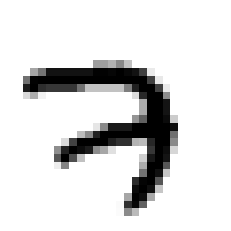

In [137]:
plt.imshow(x_train[0],cmap = "binary")
plt.axis("off")
plt.show()

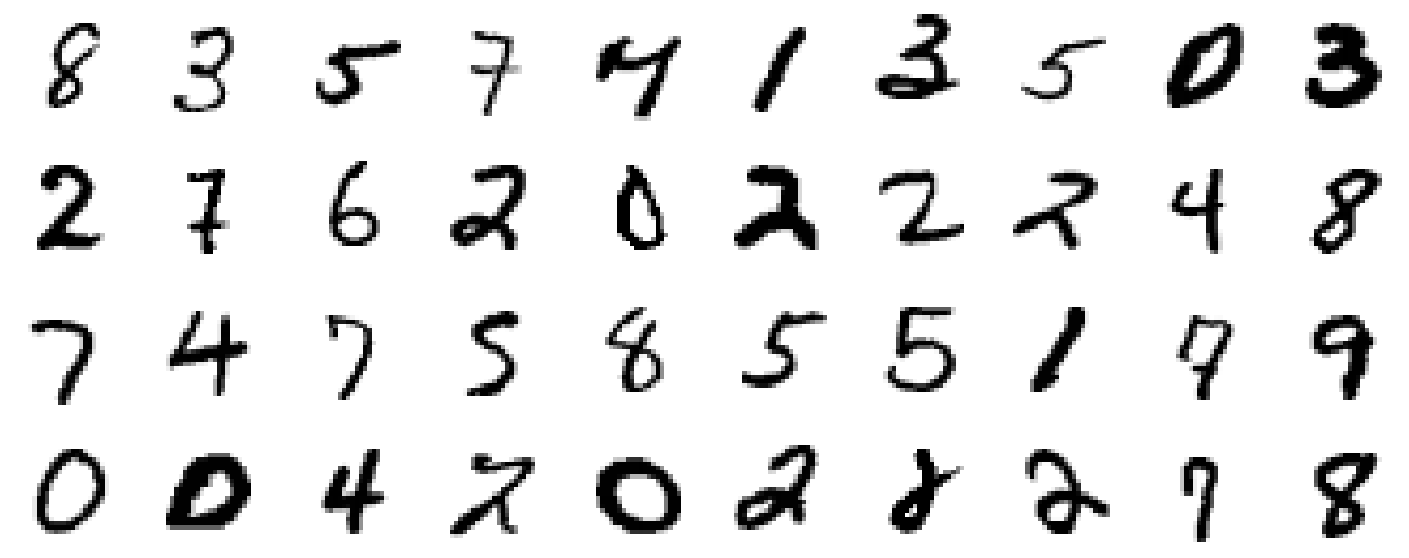

In [138]:
rows = 4
col = 10
plt.figure(figsize = (25,10))
i =0
for r in range(rows):
    for c in range(col):
        index = np.random.randint(5000,size = 40)
        plt.subplot(rows,col,i+1)
        plt.imshow(x_train[index[i]],cmap ="binary",interpolation = "nearest")
        plt.axis("off")
        i+=1
plt.show()

In [140]:
k = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses= []
    def on_batch_end(self,batch,logs):
        self.rates.append(k.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        k.set_value(self.model.optimizer.lr,self.model.optimizer.lr * self.factor)
    

In [141]:
k.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [142]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation = "relu"),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

In [10]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["accuracy"])
expo_lr = ExponentialLearningRate(factor = 1.005)

NameError: name 'model' is not defined

In [144]:
history = model.fit(x_train,y_train,epochs = 1,validation_data = (x_valid,y_valid),
                    callbacks = [expo_lr])

1719/1719 [==============================] - 9s 5ms/step - loss: 0.2565 - accuracy: 0.0968 - val_loss: 6.7056e-06 - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

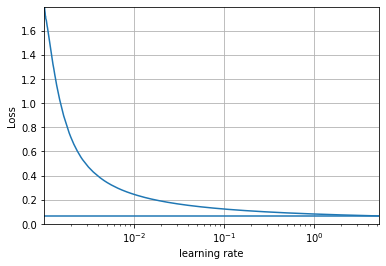

In [147]:
plt.plot(expo_lr.rates,expo_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expo_lr.losses),min(expo_lr.rates),max(expo_lr.rates))
plt.axis([min(expo_lr.rates),max(expo_lr.rates),0,expo_lr.losses[0]])
plt.grid()
plt.xlabel("learning rate")
plt.ylabel("Loss")


In [148]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42) 

In [149]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation = "relu"),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

In [150]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [151]:
import os

In [152]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [153]:

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0086 - accuracy: 0.0973 - val_loss: 1.3624e-05 - val_accuracy: 0.0958
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3621e-05 - accuracy: 0.0987 - val_loss: 6.3359e-06 - val_accuracy: 0.0958
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 7.3181e-06 - accuracy: 0.0988 - val_loss: 4.0450e-06 - val_accuracy: 0.0958
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 4.9772e-06 - accuracy: 0.0993 - val_loss: 2.9391e-06 - val_accuracy: 0.0958
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 3.8873e-06 - accuracy: 0.0989 - val_loss: 2.2940e-06 - val_accuracy: 0.0958
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.9579e-06 - accuracy: 0.1007 - val_loss: 1.8734e-06 - val_accuracy: 0.0958
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.5901e-

In [154]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 28.2808 - accuracy: 0.0980


[28.28076934814453, 0.09799999743700027]

In [155]:

%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
